***Importing the libraries***

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

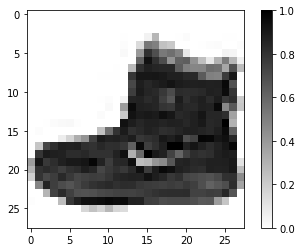

In [17]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [20]:
test_images = test_images/255.0
train_images = train_images/255.0

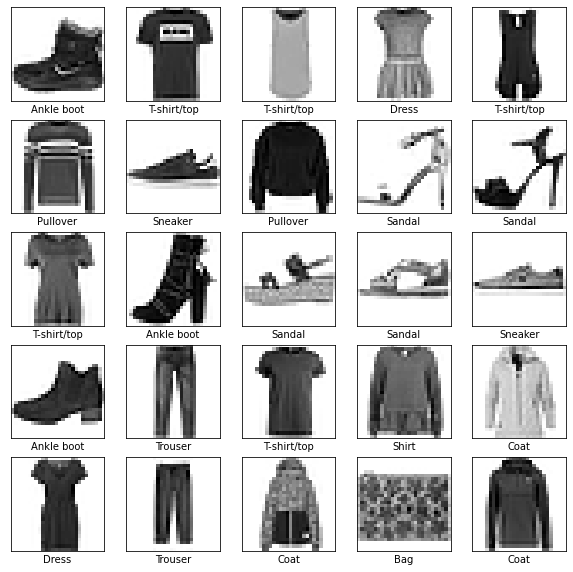

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

***Build the model***

In [36]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

In [38]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [42]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3677 - accuracy: 0.8698
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8715
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3615 - accuracy: 0.8714
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3584 - accuracy: 0.8731
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3551 - accuracy: 0.8740
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3526 - accuracy: 0.8756
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3494 - accuracy: 0.8763
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.8769
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8789
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.340

In [43]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8661


[0.3776795268058777, 0.866100013256073]

***Prediction***

In [44]:
p_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [45]:
predictions = p_model.predict(test_images)

In [48]:
for i in range(5):
  print(np.argmax(predictions[i]))

9
2
1
1
6


In [51]:
for i in range(5):
  print(test_labels[i])

9
2
1
1
6


In [81]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation = 45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


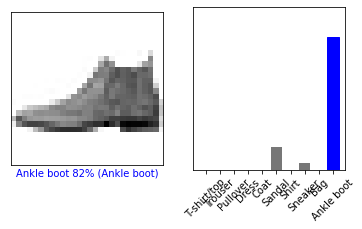

In [82]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

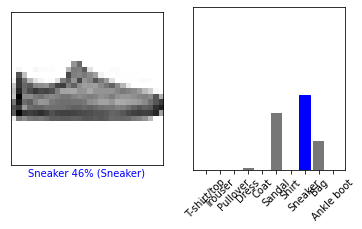

In [83]:
i=12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

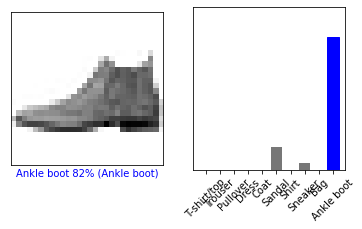

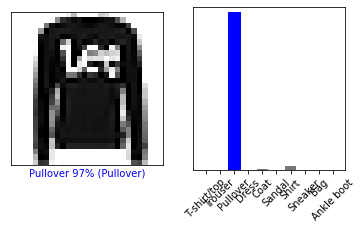

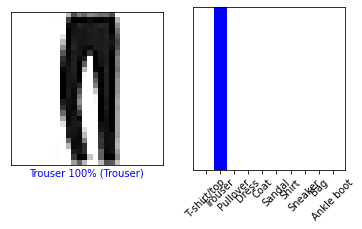

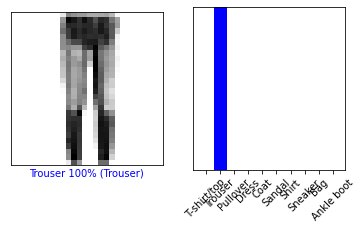

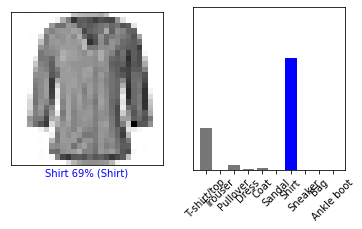

In [84]:

for i in range(5):
  plt.figure(figsize=(6,3))
  plt.grid(False)
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

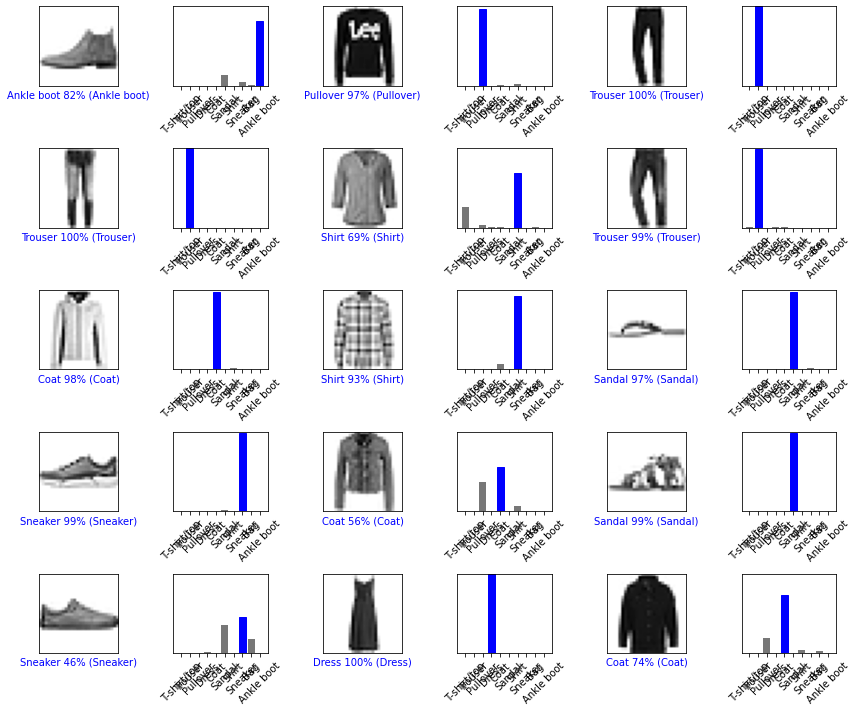

In [85]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

***using the trained model***

In [72]:
img = test_images[1]
img.shape

(28, 28)

In [73]:
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [77]:
p_image = p_model.predict(img)
np.argmax(p_image)

2

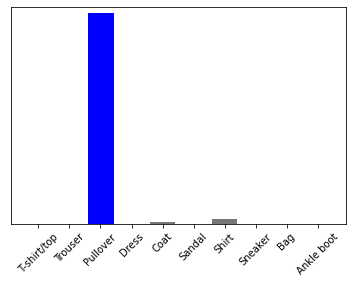

In [80]:
plot_value_array(1, p_image[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
